# Introduction to Data Exploration
## Demo: Titanic Survivals
<br><br>
This demo code will illustrate data exploration techniques using the data about all <a href = "https://en.wikipedia.org/wiki/RMS_Titanic">Titanic</a> passangers, both those that have survived and those that have not survived the tragic and the biggest passanger ship crash in the history (1912).
Please, note, that this are not just numbers, but numbers, associated with real people's destiny!


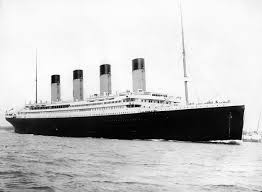

We will implement the following procedure:
1. Prepare the environment by importing the major libraries, which contain modules and functions we will need.
2. Get the available data
3. Explore the data to get an impression of what does it contain.
4. Clean the data, so it can be further analysed

# Environment

In [1]:
# import pandas for structuring the data
import pandas as pd

# import numpy for numerical analysis
import numpy as np

# import libs for diagrams inline with the text
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# other utilities
from sklearn import datasets, preprocessing, metrics

# Data Input
In this demo we will use an excel file with the original data. In many other cases we can only find plain text or csv files.

In [2]:
# read the Excel file from your data folder into a data frame
df = pd.read_excel('Titanic.xls', index_col=None, na_values=['NA'])

In [3]:
# see the size
df.shape

(1309, 14)

In [4]:
# see which are the attribute labels
list(df)

['pclass',
 'survived',
 'name',
 'sex',
 'age',
 'sibsp',
 'parch',
 'ticket',
 'fare',
 'cabin',
 'embarked',
 'boat',
 'body',
 'home.dest']

In [5]:
# see the first five records
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


# Data Exploration

In [6]:
# see the types of the attributes
df.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [7]:
# get some insights of the value scope
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


### Measures of Central Tendency

In [8]:
# mean
# np.mean(df[['age']])
np.mean(df.age)


29.8811345124283

In [9]:
# mean
np.average(df.age)

nan

In [10]:
# weighted mean
np.average(df.age, weights=df.pclass)

nan

In [11]:
# trimmed mean - ignores the 10% extream values from both ends (deciles)
from scipy import stats as st
st.trim_mean(df.age, 0.1)

nan

### Measures of Variability

In [12]:
# standard deviation
df.age.std()

14.413499699923594

In [13]:
# quantiles
df.age.quantile(0.75) - df.age.quantile(0.25)

18.0

In [14]:
# quantiles
df.age.quantile([0.05, 0.25, 0.50, 0.75, 0.95])

0.05     5.0
0.25    21.0
0.50    28.0
0.75    39.0
0.95    57.0
Name: age, dtype: float64

## Plotting

### Box Plot

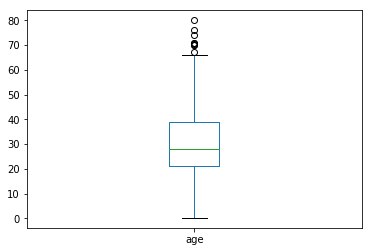

In [15]:
# box plot
# here we see the median25th and 75th percentiles, the range, and the outliers
df.age.plot.box()

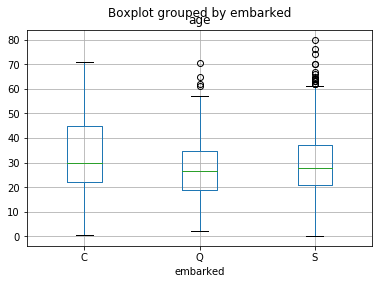

In [16]:
# categorical data vs numeric data
df.boxplot(by='embarked', column='age')

### Histogram

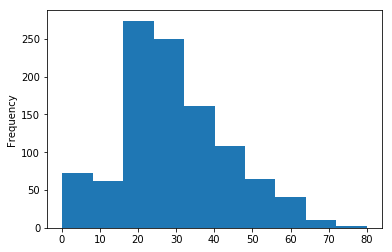

In [17]:
df.age.plot.hist()

### Density Plot

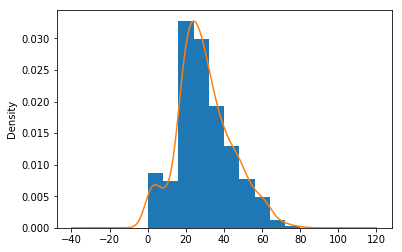

In [18]:
# parameters can controls the smoothness
df.age.plot.hist(density=True)
df.age.plot.density()

### Bar Charts

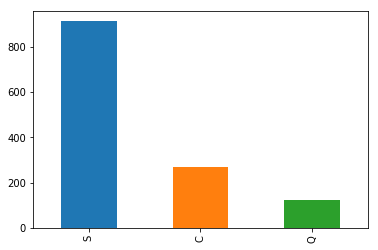

In [19]:
# Non-numeric data is not included in the statistic above, but can be plotted
df['embarked'].value_counts().plot(kind='bar')

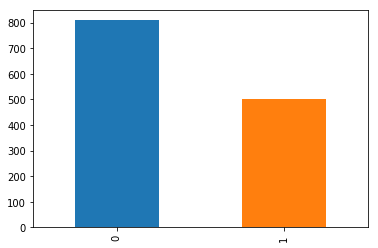

In [20]:
# Numeric data can also be plotted 
df['survived'].value_counts().plot(kind='bar')

### Scatterplot

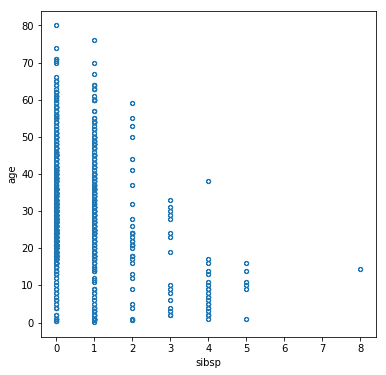

In [21]:
df.plot.scatter(x='sibsp', y='age', figsize=(6, 6), marker = '$\u25EF$')

### Contour Plot

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:1480: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:1481: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:1169: RuntimeWarning: invalid value encountered in greater
  inside = (self.levels > self.zmin) & (self.levels < self.zmax)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:1169: RuntimeWarning: invalid value encountered in less
  inside = (self.levels > self.zmin) & (self.levels < self.zmax)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa

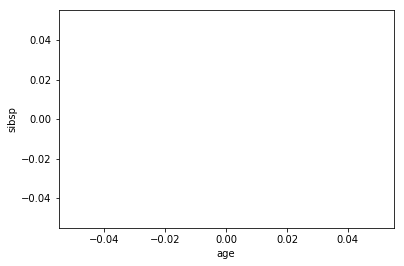

In [22]:
# a topographical map, presents the density of points of two variables
sns.kdeplot(df.age, df.sibsp)

### Violin Plot

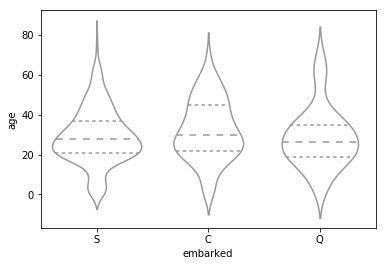

In [23]:
# enhancement to the boxplot
# shos the dencity estimates
sns.violinplot(df.embarked, df.age, inner="quartile", color="white")

## Correlation

In [24]:
# Correlation matrix
corrmat = df.corr()
corrmat

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


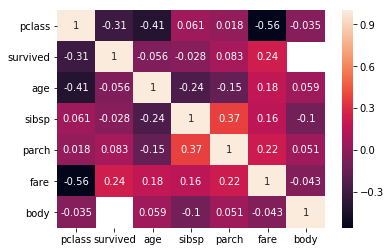

In [25]:
sns.heatmap(corrmat, annot=True)
plt.show()

## Further Exploration

Incredibly low % of survivals: 38% <br>
Titanic was only carrying 20 lifeboats for 1317 passengers and 885 crew members aboard!

#### Social status

In [26]:
# Did the social class matter?
social = df.groupby('pclass').mean()
social

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


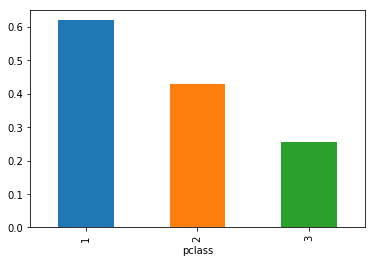

In [27]:
# plot
social['survived'].plot.bar()

#### Gender

In [28]:
# Did the gender matter?
gender = df.groupby('sex').mean()
gender

,pclass,survived,age,sibsp,parch,fare,body
sex,,,,,,,
female,2.154506,0.727468,28.687071,0.652361,0.633047,46.198097,166.62500
male,2.372479,0.190985,30.585233,0.413998,0.247924,26.154601,160.39823


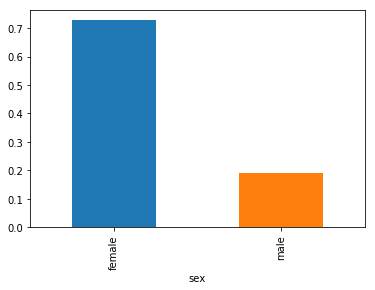

In [29]:
# plot
gender['survived'].plot.bar()

In [30]:
# gender by class
gender_by_class = df.groupby(['pclass','sex']).mean()
gender_by_class

survived        age     sibsp     parch        fare        body
pclass sex                                                                    
1      female  0.965278  37.037594  0.555556  0.472222  109.412385         NaN
       male    0.340782  41.029250  0.340782  0.279330   69.888385  162.828571
2      female  0.886792  27.499191  0.500000  0.650943   23.234827   52.000000
       male    0.146199  30.815401  0.327485  0.192982   19.904946  171.233333
3      female  0.490741  22.185307  0.791667  0.731481   15.324250  183.000000
       male    0.152130  25.962273  0.470588  0.255578   12.415462  151.854167

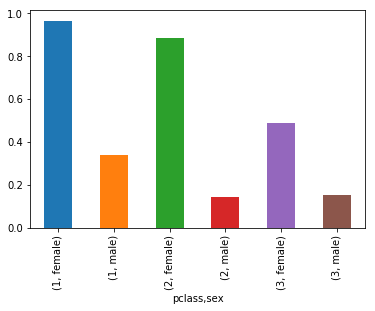

In [31]:
# plot
gender_by_class['survived'].plot.bar()

#### Age

In [32]:
# Did the age matter?
bins = [0,10,20,30,40,50,60,70,80] 
age=df.groupby([(pd.cut(df.age, bins))]).count()
age

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
age,,,,,,,,,,,,,,
"(0, 10]",86,86,86,86,86,86,86,86,86,12,86,50,1,51
"(10, 20]",162,162,162,162,162,162,162,162,162,25,162,59,13,98
"(20, 30]",361,361,361,361,361,361,361,361,361,62,361,132,33,208
"(30, 40]",210,210,210,210,210,210,210,210,210,65,209,90,32,141
"(40, 50]",132,132,132,132,132,132,132,132,132,54,132,49,22,103
"(50, 60]",62,62,62,62,62,62,62,62,62,36,62,29,9,58
"(60, 70]",27,27,27,27,27,27,27,27,26,15,26,6,8,22
"(70, 80]",6,6,6,6,6,6,6,6,6,3,6,2,2,4


In [33]:
# average per range
age_by_gender=df.groupby([(pd.cut(df.age, bins)), 'sex']).mean()
age_by_gender

pclass  survived        age     sibsp     parch       fare  \
age      sex                                                                    
(0, 10]  female  2.682927  0.609756   4.355693  1.463415  1.439024  26.932924   
         male    2.622222  0.555556   4.257407  1.933333  1.377778  31.716664   
(10, 20] female  2.323529  0.735294  17.044118  0.602941  0.455882  33.923963   
         male    2.670213  0.148936  17.457447  0.617021  0.351064  25.105453   
(20, 30] female  2.158730  0.722222  25.333333  0.476190  0.492063  42.511079   
         male    2.485106  0.182979  25.319149  0.246809  0.072340  20.463863   
(30, 40] female  1.826667  0.813333  35.306667  0.493333  0.626667  64.832721   
         male    2.266667  0.207407  35.018519  0.288889  0.296296  30.406387   
(40, 50] female  1.739130  0.782609  45.782609  0.456522  0.913043  66.778717   
         male    1.813953  0.186047  45.145349  0.337209  0.139535  36.810901   
(50, 60] female  1.160000  0.920000  55.680000  0.640000  0.520000  89.606832   
         male    1.540541  0.189189  54.851351  0.270270  0.270270  43.251803   
(60, 70] female  1.333333  0.833333  63.166667  0.500000  0.500000  83.172217   
         male    1.571429  0.047619  63.642857  0.285714  0.428571  61.018960   
(70, 80] female  1.000000  1.000000  76.000000  1.000000  0.000000  78.850000   
         male    1.800000  0.200000  73.300000  0.000000  0.000000  25.936680   

                       body  
age      sex                 
(0, 10]  female         NaN  
         male      4.000000  
(10, 20] female  226.666667  
         male    139.100000  
(20, 30] female  206.000000  
         male    169.281250  
(30, 40] female  194.000000  
         male    152.766667  
(40, 50] female    7.000000  
         male    158.809524  
(50, 60] female   52.000000  
         male    173.250000  
(60, 70] female         NaN  
         male    207.875000  
(70, 80] female         NaN  
         male     96.500000

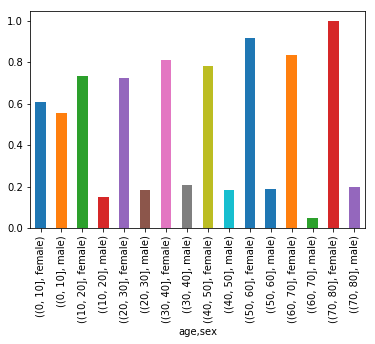

In [36]:
# plot
age_by_gender['survived'].plot.bar()

# Data Preparation

In [37]:
# count the missing values
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [38]:
# fill the missing home destination with 'NA'
df["home.dest"] = df["home.dest"].fillna("NA")
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [39]:
# remove most empty columns, which are not so informative
df = df.drop(['body', 'cabin', 'boat'], axis=1)

In [40]:
df.shape

(1309, 11)

In [41]:
# replace the missing age with the average age
mean_age=df.age.mean()
df['age']= df['age'].fillna(mean_age)

In [42]:
# see the current number of data
df.count()


pclass       1309
survived     1309
name         1309
sex          1309
age          1309
sibsp        1309
parch        1309
ticket       1309
fare         1308
embarked     1307
home.dest    1309
dtype: int64

In [43]:
# see the current state of null values
df.isnull().sum()

pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         1
embarked     2
home.dest    0
dtype: int64

In [44]:
# replace the  missing fare values with the average
mean_fare = df.fare.mean()
mean_fare

33.29547928134572

In [45]:
df['fare'] = df['fare'].fillna(mean_fare)

In [46]:
# find the most used 'embarked' value
mode_emb = df.embarked.mode()
mode_emb

0    S
dtype: object

In [47]:
# replace the missing embarked values with the mode
df['embarked']=df['embarked'].fillna('S')

#### Transform data into numeric

As a preprocessing, we will convert the strings into integer keys, making it easier for the  algorithms to find patterns. 
- “Female” and “Male” are categorical values and will be converted to 0 and 1 respectively
- The “name”, “ticket”, and “home.dest” columns consist of non-categorical string values, which are difficult to use in our algorithm, so we will drop them from the data set

In [48]:
# define a function for transformation
def preprocessor(df):
    processed_df = df.copy()
    le = preprocessing.LabelEncoder()
    processed_df['sex'] = le.fit_transform(df['sex'])
    processed_df['embarked'] = le.fit_transform(df['embarked'])
    processed_df = processed_df.drop(['name','ticket','home.dest'], axis=1)
    return processed_df

In [49]:
# call the transformation function
dfp = preprocessor(df)

In [50]:
dfp.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,0,29.0000,0,0,211.3375,2
1,1,1,1,0.9167,1,2,151.5500,2
2,1,0,0,2.0000,1,2,151.5500,2
3,1,0,1,30.0000,1,2,151.5500,2
4,1,0,0,25.0000,1,2,151.5500,2


In [51]:
df.shape

(1309, 11)

## Reference
https://www.kaggle.com/c/titanic/data <br>
https://blog.socialcops.com/technology/data-science/machine-learning-python/<br>
https://www.youtube.com/watch?v=siEPqQsPLKA